# Load requirepackage for analysis task

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
# from sklearn.model_selection import GridSearchCV
import seaborn as sns
from scipy import stats, integrate
from scipy.stats import poisson
from fitter import Fitter

#from sklearn.model_selection import train_test_split
from sklearn import neural_network
from sklearn import preprocessing
from sklearn import svm
from sklearn import metrics
from sklearn import tree

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

## Load fare and trip data

In [3]:
# Load fare and trip data

data_dir = '../data/'
trip = pd.read_csv(data_dir + 'trip_data_4.csv')
trip.set_index(['medallion', ' hack_license'], inplace = True)
fare = pd.read_csv(data_dir + 'trip_fare_4.csv')
fare.set_index(['medallion', ' hack_license'], inplace = True)

C:\Users\alexa\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Attribute available in dataset

In [4]:
trip.columns

Index([' vendor_id', ' rate_code', ' store_and_fwd_flag', ' pickup_datetime',
       ' dropoff_datetime', ' passenger_count', ' trip_time_in_secs',
       ' trip_distance', ' pickup_longitude', ' pickup_latitude',
       ' dropoff_longitude', ' dropoff_latitude'],
      dtype='object')

In [5]:
fare.columns

Index([' vendor_id', ' pickup_datetime', ' payment_type', ' fare_amount',
       ' surcharge', ' mta_tax', ' tip_amount', ' tolls_amount',
       ' total_amount'],
      dtype='object')

In [6]:
trip_sample = trip.sample(frac=0.1, replace=True)

In [7]:
fare_sample = fare.sample(frac=0.1, replace=True)

# Search for Number of Passenger Per trip distribution

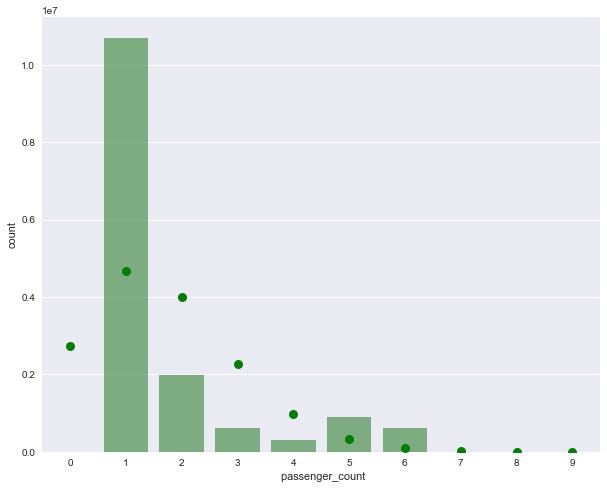

In [8]:
x = trip[' passenger_count']
k = np.arange(x.max()+1)
sns.countplot(x, order=k, color='g', alpha=0.5)
mlest = x.mean()
plt.plot(k, poisson.pmf(k, mlest)*len(x), 'go', markersize=9)

C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


Fitted alpha distribution with error=131.83035665993395)
Fitted anglit distribution with error=142.3503043076668)
Fitted arcsine distribution with error=144.2210429175664)
Fitted argus distribution with error=144.6286531162115)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:404: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


SKIPPED beta distribution (taking more than 30 seconds)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:554: RuntimeWarning: divide by zero encountered in true_divide
  a/(b-1.0),
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:558: RuntimeWarning: divide by zero encountered in true_divide
  a*(a+1.0)/((b-2.0)*(b-1.0)),
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1037: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu


SKIPPED betaprime distribution (taking more than 30 seconds)
Fitted bradford distribution with error=142.7064425506897)
SKIPPED burr distribution (taking more than 30 seconds)
SKIPPED burr12 distribution (taking more than 30 seconds)
Fitted cauchy distribution with error=146.4591751766144)
Fitted chi distribution with error=141.07453165432852)
SKIPPED chi2 distribution (taking more than 30 seconds)
Fitted cosine distribution with error=143.19107551306834)
SKIPPED dgamma distribution (taking more than 30 seconds)
SKIPPED dweibull distribution (taking more than 30 seconds)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.00025000000000000001.
  RuntimeWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.00016666666666666666.
  RuntimeWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.00027777777777777778.
  RuntimeWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.00041666666666666664.
  RuntimeWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape

SKIPPED erlang distribution (taking more than 30 seconds)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.55773255415013989.
  RuntimeWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.55773255415476997.
  RuntimeWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.5577325541576279.
  RuntimeWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.55773255416820255.
  RuntimeWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape parameter of

Fitted expon distribution with error=142.5330963987872)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:1183: RuntimeWarning: divide by zero encountered in log
  return exparg + np.log(0.5 * invK * sc.erfc(-(x - invK) / np.sqrt(2)))


SKIPPED exponnorm distribution (taking more than 30 seconds)
SKIPPED exponpow distribution (taking more than 30 seconds)
SKIPPED exponweib distribution (taking more than 30 seconds)
SKIPPED f distribution (taking more than 30 seconds)
Fitted fatiguelife distribution with error=137.90833875793516)
SKIPPED fisk distribution (taking more than 30 seconds)
SKIPPED foldcauchy distribution (taking more than 30 seconds)
Fitted foldnorm distribution with error=141.6416693631683)
SKIPPED frechet_l distribution (taking more than 30 seconds)
Fitted frechet_r distribution with error=140.54088605913014)
Fitted gamma distribution with error=139.43105421380986)
SKIPPED gausshyper distribution (taking more than 30 seconds)
SKIPPED genexpon distribution (taking more than 30 seconds)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:1894: RuntimeWarning: invalid value encountered in true_divide
  np.sign(c)*(-g3+(g2+2*g2mg12)*g1)/((g2mg12)**(3./2.)))
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:1899: RuntimeWarning: invalid value encountered in true_divide
  (g4+(-4*g3+3*(g2+g2mg12)*g1)*g1)/((g2mg12)**2))
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1612: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


SKIPPED genextreme distribution (taking more than 30 seconds)
SKIPPED gengamma distribution (taking more than 30 seconds)
SKIPPED genhalflogistic distribution (taking more than 30 seconds)
SKIPPED genlogistic distribution (taking more than 30 seconds)
SKIPPED gennorm distribution (taking more than 30 seconds)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:1753: RuntimeWarning: divide by zero encountered in true_divide
  val = val + cnk * (-1) ** ki / (1.0 - c * ki)


SKIPPED genpareto distribution (taking more than 30 seconds)
Fitted gilbrat distribution with error=140.7175240441365)
Fitted gompertz distribution with error=141.84038418669968)
Fitted gumbel_l distribution with error=143.60728023775752)
Fitted gumbel_r distribution with error=138.74415957641057)
Fitted halfcauchy distribution with error=142.33010812808905)
Fitted halfgennorm distribution with error=141.7287181961069)
Fitted halflogistic distribution with error=141.50951150526643)
Fitted halfnorm distribution with error=141.64009150493396)
Fitted hypsecant distribution with error=139.75418343154757)
Fitted invgamma distribution with error=135.64526270852724)
Fitted invgauss distribution with error=137.6585048252807)
SKIPPED invweibull distribution (taking more than 30 seconds)
SKIPPED johnsonsb distribution (taking more than 30 seconds)
SKIPPED johnsonsu distribution (taking more than 30 seconds)
SKIPPED kappa3 distribution (taking more than 30 seconds)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2827: RuntimeWarning: divide by zero encountered in log
  trm = _norm_pdf(a + b * np.log(x + np.sqrt(x2+1)))


SKIPPED kappa4 distribution (taking more than 30 seconds)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:35: RuntimeWarning: floating point number truncated to an integer
  return 1.0 - sc.smirnov(n, x)


SKIPPED ksone distribution (taking more than 30 seconds)
SKIPPED kstwobign distribution (taking more than 30 seconds)
Fitted laplace distribution with error=134.92742369255916)
Fitted levy distribution with error=142.1607075125275)
Fitted levy_l distribution with error=145.482452218688)
SKIPPED levy_stable distribution (taking more than 30 seconds)
SKIPPED loggamma distribution (taking more than 30 seconds)
Fitted logistic distribution with error=140.67254650884686)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:3157: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)


SKIPPED loglaplace distribution (taking more than 30 seconds)
Fitted lognorm distribution with error=137.49607796125255)
Fitted lomax distribution with error=144.38984826638077)
Fitted maxwell distribution with error=141.50985529093435)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:364: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  warnings.warn(msg, IntegrationWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


SKIPPED mielke distribution (taking more than 30 seconds)
Fitted nakagami distribution with error=141.0745483744335)
SKIPPED ncf distribution (taking more than 30 seconds)
SKIPPED nct distribution (taking more than 30 seconds)
SKIPPED ncx2 distribution (taking more than 30 seconds)
Fitted norm distribution with error=142.20731251584996)
SKIPPED pareto distribution (taking more than 30 seconds)
SKIPPED pearson3 distribution (taking more than 30 seconds)
Fitted powerlaw distribution with error=143.5162205333512)
SKIPPED powerlognorm distribution (taking more than 30 seconds)
SKIPPED powernorm distribution (taking more than 30 seconds)
Fitted rayleigh distribution with error=141.2881179310433)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4347: RuntimeWarning: divide by zero encountered in power
  return np.power((1.0 - x**2), c / 2.0 - 1) / sc.beta(0.5, c / 2.0)


SKIPPED rdist distribution (taking more than 30 seconds)
SKIPPED recipinvgauss distribution (taking more than 30 seconds)
SKIPPED reciprocal distribution (taking more than 30 seconds)
SKIPPED rice distribution (taking more than 30 seconds)
SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
Fitted semicircular distribution with error=143.60331067211277)
SKIPPED skewnorm distribution (taking more than 30 seconds)
SKIPPED t distribution (taking more than 30 seconds)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4685: RuntimeWarning: divide by zero encountered in true_divide
  choicelist = [u * x / c, u, u * (1 - x) / (1 - d)]


Fitted trapz distribution with error=145.86503456131976)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4734: RuntimeWarning: divide by zero encountered in true_divide
  return np.where(x < c, 2*x/c, 2*(1-x)/(1-c))


SKIPPED triang distribution (taking more than 30 seconds)
SKIPPED truncexpon distribution (taking more than 30 seconds)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4838: RuntimeWarning: divide by zero encountered in log
  self._logdelta = np.log(self._delta)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4838: RuntimeWarning: invalid value encountered in log
  self._logdelta = np.log(self._delta)


SKIPPED truncnorm distribution (taking more than 30 seconds)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4896: RuntimeWarning: divide by zero encountered in power
  Px = Fx**(lam-1.0) + (np.asarray(1-Fx))**(lam-1.0)


SKIPPED tukeylambda distribution (taking more than 30 seconds)
SKIPPED uniform distribution (taking more than 30 seconds)
SKIPPED vonmises distribution (taking more than 30 seconds)
SKIPPED vonmises_line distribution (taking more than 30 seconds)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4978: RuntimeWarning: overflow encountered in exp
  return np.exp(kappa * np.cos(x)) / (2*np.pi*sc.i0(kappa))
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4978: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(kappa * np.cos(x)) / (2*np.pi*sc.i0(kappa))


Fitted wald distribution with error=139.66709260398315)
SKIPPED weibull_max distribution (taking more than 30 seconds)
SKIPPED weibull_min distribution (taking more than 30 seconds)
Fitted wrapcauchy distribution with error=nan)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:528: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):


,sumsquare_error
alpha,131.830357
laplace,134.927424
invgamma,135.645263
lognorm,137.496078
invgauss,137.658505


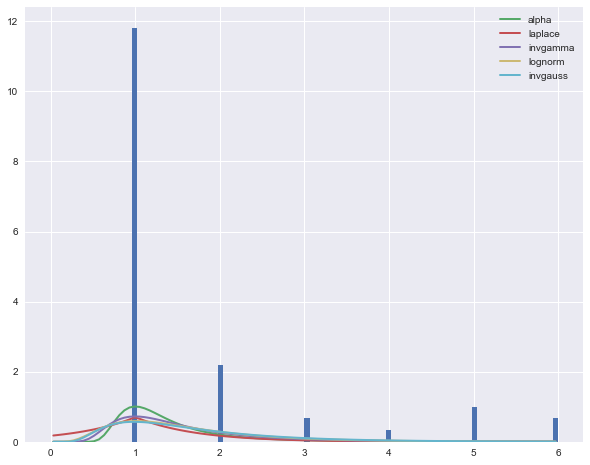

C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1612: RuntimeWarning: invalid value encountered in log
  return log(self._pdf(x, *args))


In [9]:
f = Fitter(trip_sample[' passenger_count'])
f.fit()
f.summary()

C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


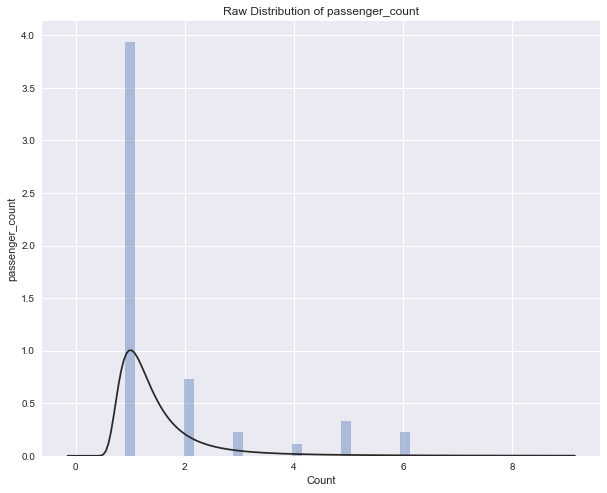

In [9]:
ax2 = sns.distplot(trip[' passenger_count'], kde=False, fit=stats.alpha)
ax2.set_title('Raw Distribution of passenger_count')
ax2.set(xlabel='Count', ylabel='passenger_count')

## Result:
looking at the above fit on the sample (10%) data of the original data set, it seems like alpha is the distribution that is the closest to the sample distribution.

But based on the past experience on quening theory, customers arrival tends to follow poisson distribution as its property of memoryless (where arrival of the next group of customers are not related to any previous arrival) Poisson will also do a great job fitting the empirical distribution of customer count.

Also by fitting the alpha distribution back to the full data set. We can see it fitted well but the dropped was faster than poisson (starts from 3 to 4 while poisson fitted the tail better).

Hence it would be better to fit it with poisson.

## Search for payment type distribution

In [8]:
fare_sample[' payment_type_cat'] = fare_sample[' payment_type'].astype('category')
fare_sample[' payment_type_cat'].value_counts()

CRD    811421
CSH    693460
NOC      3425
DIS      1125
UNK       616
Name:  payment_type_cat, dtype: int64

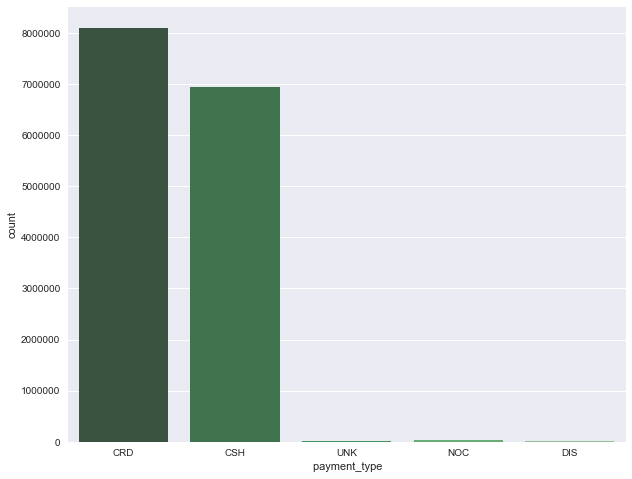

In [11]:
sns.countplot(x=" payment_type", data=fare, palette="Greens_d");

In [13]:
fare_sample[' payment_type_cat'].value_counts()

CRD    811421
CSH    693460
NOC      3425
DIS      1125
UNK       616
Name:  payment_type_cat, dtype: int64

In [15]:
fare_sample[' payment_type_cat'].describe()

count     1510047
unique          5
top           CRD
freq       811421
Name:  payment_type_cat, dtype: object

Payment type consists of 5 distinct outcome, with marjority 'CRD' and 'CSH'.
One can use multinomial distribution (a generalised version of Bernoulli distribution.) where class = 5.
We can estimate the prior probability of each class using either the sample data summary (count of each class divide by total):
Class Count     Prior Prob est.
CRD	  811421	53.73%
CSH	  693460	45.92%
NOC	  3425	    0.23%
DIS	  1125	    0.07%
UNK	  616	    0.04%

## Search for fare amount distribution

C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


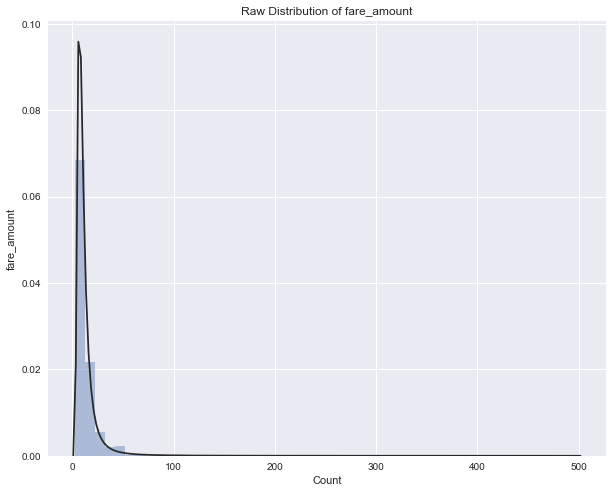

In [18]:
ax2 = sns.distplot(fare_sample[' fare_amount'], kde=False, fit=stats.alpha)
ax2.set_title('Raw Distribution of fare_amount')
ax2.set(xlabel='Count', ylabel='fare_amount')

C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


Fitted alpha distribution with error=0.00020525543285493508)
Fitted anglit distribution with error=0.009861575301295836)
Fitted arcsine distribution with error=0.008753372116069743)
SKIPPED argus distribution (taking more than 30 seconds)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:404: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


SKIPPED beta distribution (taking more than 30 seconds)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:554: RuntimeWarning: divide by zero encountered in true_divide
  a/(b-1.0),
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:558: RuntimeWarning: divide by zero encountered in true_divide
  a*(a+1.0)/((b-2.0)*(b-1.0)),
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1037: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu


SKIPPED betaprime distribution (taking more than 30 seconds)
SKIPPED bradford distribution (taking more than 30 seconds)
SKIPPED burr distribution (taking more than 30 seconds)
SKIPPED burr12 distribution (taking more than 30 seconds)
Fitted cauchy distribution with error=0.000867794993459973)
SKIPPED chi distribution (taking more than 30 seconds)
SKIPPED chi2 distribution (taking more than 30 seconds)
Fitted cosine distribution with error=0.00965390219558925)
Fitted dgamma distribution with error=0.0007504373310701203)
Fitted dweibull distribution with error=0.0005636000436665721)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.00025000000000000001.
  RuntimeWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.00016666666666666666.
  RuntimeWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.00027777777777777778.
  RuntimeWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.00046296296296296298.
  RuntimeWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape

Fitted erlang distribution with error=0.0003193361676469137)
Fitted expon distribution with error=0.0008770265615668263)
Fitted exponnorm distribution with error=0.0007372010830630605)
SKIPPED exponpow distribution (taking more than 30 seconds)
SKIPPED exponweib distribution (taking more than 30 seconds)
SKIPPED f distribution (taking more than 30 seconds)
Fitted fatiguelife distribution with error=0.000557432457306096)
SKIPPED fisk distribution (taking more than 30 seconds)
SKIPPED foldcauchy distribution (taking more than 30 seconds)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1612: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


SKIPPED foldnorm distribution (taking more than 30 seconds)
SKIPPED frechet_l distribution (taking more than 30 seconds)
Fitted frechet_r distribution with error=0.0004931019054645004)
Fitted gamma distribution with error=0.004030328927165336)
SKIPPED gausshyper distribution (taking more than 30 seconds)
SKIPPED genexpon distribution (taking more than 30 seconds)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:1894: RuntimeWarning: invalid value encountered in true_divide
  np.sign(c)*(-g3+(g2+2*g2mg12)*g1)/((g2mg12)**(3./2.)))
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:1899: RuntimeWarning: invalid value encountered in true_divide
  (g4+(-4*g3+3*(g2+g2mg12)*g1)*g1)/((g2mg12)**2))


SKIPPED genextreme distribution (taking more than 30 seconds)
SKIPPED gengamma distribution (taking more than 30 seconds)
SKIPPED genhalflogistic distribution (taking more than 30 seconds)
SKIPPED genlogistic distribution (taking more than 30 seconds)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2587: RuntimeWarning: divide by zero encountered in power
  return 1.0/Cinv * x**(a-1.0) * (1.0-x)**(b-1.0) / (1.0+z*x)**c


SKIPPED gennorm distribution (taking more than 30 seconds)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:1753: RuntimeWarning: divide by zero encountered in true_divide
  val = val + cnk * (-1) ** ki / (1.0 - c * ki)


SKIPPED genpareto distribution (taking more than 30 seconds)
Fitted gilbrat distribution with error=0.0012797113475700199)
SKIPPED gompertz distribution (taking more than 30 seconds)
Fitted gumbel_l distribution with error=0.008127920760297258)
Fitted gumbel_r distribution with error=0.000423254900455393)
Fitted halfcauchy distribution with error=0.001307894728068269)
Fitted halfgennorm distribution with error=0.0007184747508635472)
Fitted halflogistic distribution with error=0.0004394039586812366)
Fitted halfnorm distribution with error=0.0009431968604908533)
Fitted hypsecant distribution with error=0.00077712506342908)
Fitted invgamma distribution with error=0.0004229350919877389)
Fitted invgauss distribution with error=0.0006128313658220547)
SKIPPED invweibull distribution (taking more than 30 seconds)
SKIPPED johnsonsb distribution (taking more than 30 seconds)
SKIPPED johnsonsu distribution (taking more than 30 seconds)
SKIPPED kappa3 distribution (taking more than 30 seconds)
SKI

C:\Users\alexa\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:35: RuntimeWarning: floating point number truncated to an integer
  return 1.0 - sc.smirnov(n, x)


SKIPPED ksone distribution (taking more than 30 seconds)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1612: RuntimeWarning: invalid value encountered in log
  return log(self._pdf(x, *args))


SKIPPED kstwobign distribution (taking more than 30 seconds)
Fitted laplace distribution with error=0.0007146554452224994)
Fitted levy distribution with error=0.0022314054021681244)
SKIPPED levy_l distribution (taking more than 30 seconds)
SKIPPED levy_stable distribution (taking more than 30 seconds)
SKIPPED loggamma distribution (taking more than 30 seconds)
Fitted logistic distribution with error=0.0011349397933096438)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:3157: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)


SKIPPED loglaplace distribution (taking more than 30 seconds)
SKIPPED lognorm distribution (taking more than 30 seconds)
Fitted lomax distribution with error=0.0009038104058121804)
Fitted maxwell distribution with error=0.0021853063067386372)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:364: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  warnings.warn(msg, IntegrationWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


SKIPPED mielke distribution (taking more than 30 seconds)
SKIPPED nakagami distribution (taking more than 30 seconds)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:3684: RuntimeWarning: divide by zero encountered in power
  return 2*nu**nu/sc.gamma(nu)*(x**(2*nu-1.0))*np.exp(-nu*x*x)


SKIPPED ncf distribution (taking more than 30 seconds)
SKIPPED nct distribution (taking more than 30 seconds)
SKIPPED ncx2 distribution (taking more than 30 seconds)
Fitted norm distribution with error=0.0027770880479953946)
Fitted pareto distribution with error=0.002963182220678364)
SKIPPED pearson3 distribution (taking more than 30 seconds)
SKIPPED powerlaw distribution (taking more than 30 seconds)
SKIPPED powerlognorm distribution (taking more than 30 seconds)
SKIPPED powernorm distribution (taking more than 30 seconds)
Fitted rayleigh distribution with error=0.0017620697427885568)
SKIPPED rdist distribution (taking more than 30 seconds)
SKIPPED recipinvgauss distribution (taking more than 30 seconds)
Fitted reciprocal distribution with error=0.010599885020095219)
SKIPPED rice distribution (taking more than 30 seconds)
SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
Fitted semicircular distribution wit

C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4685: RuntimeWarning: divide by zero encountered in true_divide
  choicelist = [u * x / c, u, u * (1 - x) / (1 - d)]


Fitted trapz distribution with error=0.010810007062357012)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4734: RuntimeWarning: divide by zero encountered in true_divide
  return np.where(x < c, 2*x/c, 2*(1-x)/(1-c))


SKIPPED triang distribution (taking more than 30 seconds)
SKIPPED truncexpon distribution (taking more than 30 seconds)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4838: RuntimeWarning: divide by zero encountered in log
  self._logdelta = np.log(self._delta)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4838: RuntimeWarning: invalid value encountered in log
  self._logdelta = np.log(self._delta)


Fitted truncnorm distribution with error=0.010599885020095219)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4896: RuntimeWarning: divide by zero encountered in power
  Px = Fx**(lam-1.0) + (np.asarray(1-Fx))**(lam-1.0)


SKIPPED tukeylambda distribution (taking more than 30 seconds)
Fitted uniform distribution with error=0.010195854818837674)
SKIPPED vonmises distribution (taking more than 30 seconds)
SKIPPED vonmises_line distribution (taking more than 30 seconds)
Fitted wald distribution with error=0.0012795794075916107)
SKIPPED weibull_max distribution (taking more than 30 seconds)
Fitted weibull_min distribution with error=0.0004931019054645004)
Fitted wrapcauchy distribution with error=nan)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:528: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):


,sumsquare_error
alpha,0.000205
erlang,0.000319
invgamma,0.000423
gumbel_r,0.000423
halflogistic,0.000439


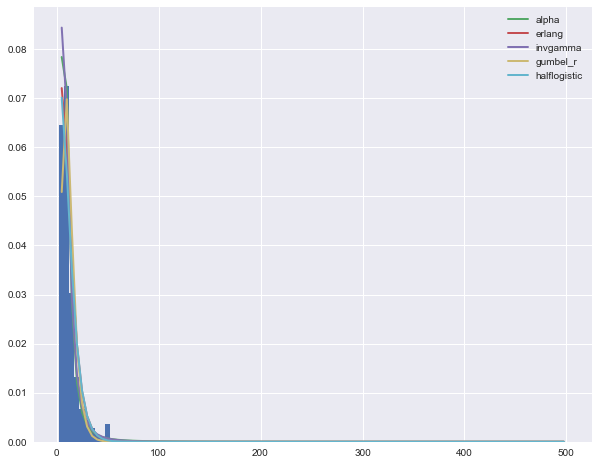

In [19]:
from fitter import Fitter
f = Fitter(fare_sample[' fare_amount'])
f.fit()
f.summary()

## Search for tip amount distribution

C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:35: RuntimeWarning: floating point number truncated to an integer
  return 1.0 - sc.smirnov(n, x)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4896: RuntimeWarning: divide by zero encountered in power
  Px = Fx**(lam-1.0) + (np.asarray(1-Fx))**(lam-1.0)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1612: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


SKIPPED alpha distribution (taking more than 30 seconds)
SKIPPED anglit distribution (taking more than 30 seconds)
SKIPPED arcsine distribution (taking more than 30 seconds)
SKIPPED argus distribution (taking more than 30 seconds)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:404: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


SKIPPED beta distribution (taking more than 30 seconds)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:554: RuntimeWarning: divide by zero encountered in true_divide
  a/(b-1.0),
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:558: RuntimeWarning: divide by zero encountered in true_divide
  a*(a+1.0)/((b-2.0)*(b-1.0)),
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1037: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu


SKIPPED betaprime distribution (taking more than 30 seconds)
SKIPPED bradford distribution (taking more than 30 seconds)
SKIPPED burr distribution (taking more than 30 seconds)
SKIPPED burr12 distribution (taking more than 30 seconds)
Fitted cauchy distribution with error=0.03016204813623053)
SKIPPED chi distribution (taking more than 30 seconds)
SKIPPED chi2 distribution (taking more than 30 seconds)
SKIPPED cosine distribution (taking more than 30 seconds)
SKIPPED dgamma distribution (taking more than 30 seconds)
SKIPPED dweibull distribution (taking more than 30 seconds)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.00025000000000000001.
  RuntimeWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.00016666666666666666.
  RuntimeWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.00027777777777777778.
  RuntimeWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.00046296296296296298.
  RuntimeWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape

SKIPPED erlang distribution (taking more than 30 seconds)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.0033806079673725977.
  RuntimeWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.0033806143190868426.
  RuntimeWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.0033806409701496922.
  RuntimeWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.0033806232027744588.
  RuntimeWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape par

Fitted expon distribution with error=0.00031946332815110793)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.003380659678847567.
  RuntimeWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.0033806598164134098.
  RuntimeWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.00338065973569413.
  RuntimeWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.0033806597912875132.
  RuntimeWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape parame

SKIPPED exponnorm distribution (taking more than 30 seconds)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.0033806598103216443.
  RuntimeWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.0033806598103271399.
  RuntimeWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.0033806598103308895.
  RuntimeWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.0033806598103148493.
  RuntimeWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape par

SKIPPED exponpow distribution (taking more than 30 seconds)
SKIPPED exponweib distribution (taking more than 30 seconds)
SKIPPED f distribution (taking more than 30 seconds)
SKIPPED fatiguelife distribution (taking more than 30 seconds)
SKIPPED fisk distribution (taking more than 30 seconds)
SKIPPED foldcauchy distribution (taking more than 30 seconds)
SKIPPED foldnorm distribution (taking more than 30 seconds)
SKIPPED frechet_l distribution (taking more than 30 seconds)
SKIPPED frechet_r distribution (taking more than 30 seconds)
SKIPPED gamma distribution (taking more than 30 seconds)
SKIPPED gausshyper distribution (taking more than 30 seconds)
SKIPPED genexpon distribution (taking more than 30 seconds)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:1894: RuntimeWarning: invalid value encountered in true_divide
  np.sign(c)*(-g3+(g2+2*g2mg12)*g1)/((g2mg12)**(3./2.)))
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:1899: RuntimeWarning: invalid value encountered in true_divide
  (g4+(-4*g3+3*(g2+g2mg12)*g1)*g1)/((g2mg12)**2))


SKIPPED genextreme distribution (taking more than 30 seconds)
SKIPPED gengamma distribution (taking more than 30 seconds)
SKIPPED genhalflogistic distribution (taking more than 30 seconds)
SKIPPED genlogistic distribution (taking more than 30 seconds)
SKIPPED gennorm distribution (taking more than 30 seconds)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:1753: RuntimeWarning: divide by zero encountered in true_divide
  val = val + cnk * (-1) ** ki / (1.0 - c * ki)


SKIPPED genpareto distribution (taking more than 30 seconds)
SKIPPED gilbrat distribution (taking more than 30 seconds)
SKIPPED gompertz distribution (taking more than 30 seconds)
Fitted gumbel_l distribution with error=0.17276308447846142)
Fitted gumbel_r distribution with error=0.008805974797908244)
SKIPPED halfcauchy distribution (taking more than 30 seconds)
SKIPPED halfgennorm distribution (taking more than 30 seconds)
SKIPPED halflogistic distribution (taking more than 30 seconds)
SKIPPED halfnorm distribution (taking more than 30 seconds)
Fitted hypsecant distribution with error=0.018019938743825726)
SKIPPED invgamma distribution (taking more than 30 seconds)
SKIPPED invgauss distribution (taking more than 30 seconds)
SKIPPED invweibull distribution (taking more than 30 seconds)
SKIPPED johnsonsb distribution (taking more than 30 seconds)
SKIPPED johnsonsu distribution (taking more than 30 seconds)
SKIPPED kappa3 distribution (taking more than 30 seconds)
SKIPPED kappa4 distribu

C:\Users\alexa\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


SKIPPED ksone distribution (taking more than 30 seconds)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1612: RuntimeWarning: invalid value encountered in log
  return log(self._pdf(x, *args))


SKIPPED kstwobign distribution (taking more than 30 seconds)
SKIPPED laplace distribution (taking more than 30 seconds)
SKIPPED levy distribution (taking more than 30 seconds)
SKIPPED levy_l distribution (taking more than 30 seconds)
SKIPPED levy_stable distribution (taking more than 30 seconds)
SKIPPED loggamma distribution (taking more than 30 seconds)
Fitted logistic distribution with error=0.02540378724467745)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:3157: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)


SKIPPED loglaplace distribution (taking more than 30 seconds)
SKIPPED lognorm distribution (taking more than 30 seconds)
SKIPPED lomax distribution (taking more than 30 seconds)
SKIPPED maxwell distribution (taking more than 30 seconds)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:364: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  warnings.warn(msg, IntegrationWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


SKIPPED mielke distribution (taking more than 30 seconds)
SKIPPED nakagami distribution (taking more than 30 seconds)
SKIPPED ncf distribution (taking more than 30 seconds)
SKIPPED nct distribution (taking more than 30 seconds)
SKIPPED ncx2 distribution (taking more than 30 seconds)
Fitted norm distribution with error=0.06373123961564593)
SKIPPED pareto distribution (taking more than 30 seconds)
SKIPPED pearson3 distribution (taking more than 30 seconds)
SKIPPED powerlaw distribution (taking more than 30 seconds)
SKIPPED powerlognorm distribution (taking more than 30 seconds)
SKIPPED powernorm distribution (taking more than 30 seconds)
Fitted rayleigh distribution with error=0.04066727236023641)
SKIPPED rdist distribution (taking more than 30 seconds)
SKIPPED recipinvgauss distribution (taking more than 30 seconds)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4446: RuntimeWarning: invalid value encountered in log
  self.d = np.log(b*1.0 / a)


SKIPPED reciprocal distribution (taking more than 30 seconds)
SKIPPED rice distribution (taking more than 30 seconds)
SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
SKIPPED semicircular distribution (taking more than 30 seconds)
SKIPPED skewnorm distribution (taking more than 30 seconds)
SKIPPED t distribution (taking more than 30 seconds)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4685: RuntimeWarning: divide by zero encountered in true_divide
  choicelist = [u * x / c, u, u * (1 - x) / (1 - d)]


SKIPPED trapz distribution (taking more than 30 seconds)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4734: RuntimeWarning: divide by zero encountered in true_divide
  return np.where(x < c, 2*x/c, 2*(1-x)/(1-c))


SKIPPED triang distribution (taking more than 30 seconds)
SKIPPED truncexpon distribution (taking more than 30 seconds)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4838: RuntimeWarning: divide by zero encountered in log
  self._logdelta = np.log(self._delta)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4838: RuntimeWarning: invalid value encountered in log
  self._logdelta = np.log(self._delta)


SKIPPED truncnorm distribution (taking more than 30 seconds)
SKIPPED tukeylambda distribution (taking more than 30 seconds)
SKIPPED uniform distribution (taking more than 30 seconds)
SKIPPED vonmises distribution (taking more than 30 seconds)
SKIPPED vonmises_line distribution (taking more than 30 seconds)
SKIPPED wald distribution (taking more than 30 seconds)
SKIPPED weibull_max distribution (taking more than 30 seconds)
SKIPPED weibull_min distribution (taking more than 30 seconds)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:528: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):


Fitted wrapcauchy distribution with error=nan)


,sumsquare_error
expon,0.000319
gumbel_r,0.008806
hypsecant,0.018020
logistic,0.025404
cauchy,0.030162


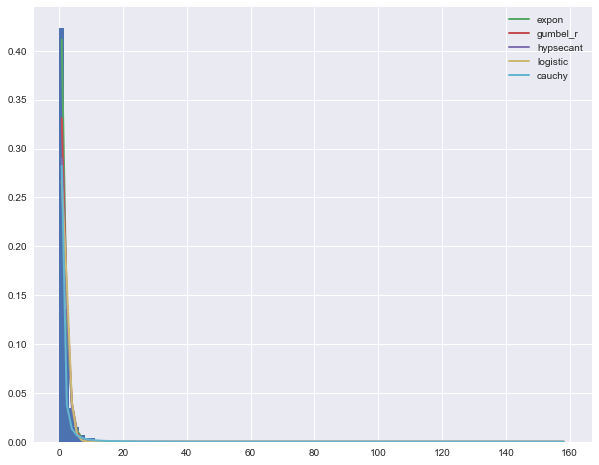

In [20]:
from fitter import Fitter
f = Fitter(fare_sample[' tip_amount'])
f.fit()
f.summary()

## Search for total amount distribution

C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:35: RuntimeWarning: floating point number truncated to an integer
  return 1.0 - sc.smirnov(n, x)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1612: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4896: RuntimeWarning: divide by zero encountered in power
  Px = Fx**(lam-1.0) + (np.asarray(1-Fx))**(lam-1.0)


SKIPPED alpha distribution (taking more than 30 seconds)
SKIPPED anglit distribution (taking more than 30 seconds)
SKIPPED arcsine distribution (taking more than 30 seconds)
SKIPPED argus distribution (taking more than 30 seconds)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:404: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


SKIPPED beta distribution (taking more than 30 seconds)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:554: RuntimeWarning: divide by zero encountered in true_divide
  a/(b-1.0),
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:558: RuntimeWarning: divide by zero encountered in true_divide
  a*(a+1.0)/((b-2.0)*(b-1.0)),
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1037: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu


SKIPPED betaprime distribution (taking more than 30 seconds)
SKIPPED bradford distribution (taking more than 30 seconds)
SKIPPED burr distribution (taking more than 30 seconds)
SKIPPED burr12 distribution (taking more than 30 seconds)
Fitted cauchy distribution with error=0.0006068685692071508)
SKIPPED chi distribution (taking more than 30 seconds)
SKIPPED chi2 distribution (taking more than 30 seconds)
SKIPPED cosine distribution (taking more than 30 seconds)
SKIPPED dgamma distribution (taking more than 30 seconds)
SKIPPED dweibull distribution (taking more than 30 seconds)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.00025000000000000001.
  RuntimeWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.00016666666666666666.
  RuntimeWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.00027777777777777778.
  RuntimeWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.00046296296296296298.
  RuntimeWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape

SKIPPED erlang distribution (taking more than 30 seconds)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.3938835420573924.
  RuntimeWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.38277490187616414.
  RuntimeWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.38456426907610286.
  RuntimeWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.39624962365673444.
  RuntimeWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape parameter of

SKIPPED expon distribution (taking more than 30 seconds)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.2291468108706485.
  RuntimeWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.1815145720382274.
  RuntimeWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.0891265464458977.
  RuntimeWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.1571231622075144.
  RuntimeWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape parameter of th

SKIPPED exponnorm distribution (taking more than 30 seconds)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.0458414498860353.
  RuntimeWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.0140635885244738.
  RuntimeWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.0536626146257122.
  RuntimeWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.0472084018728296.
  RuntimeWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape parameter of th

SKIPPED exponpow distribution (taking more than 30 seconds)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.4442677609259933.
  RuntimeWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.4781745027364299.
  RuntimeWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.4616545257966678.
  RuntimeWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.4713064755812515.
  RuntimeWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape parameter of th

SKIPPED exponweib distribution (taking more than 30 seconds)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.465816650576464.
  RuntimeWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.4659737167062219.
  RuntimeWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.459635629642182.
  RuntimeWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.4699009548258997.
  RuntimeWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the 

SKIPPED f distribution (taking more than 30 seconds)
SKIPPED fatiguelife distribution (taking more than 30 seconds)
SKIPPED fisk distribution (taking more than 30 seconds)
SKIPPED foldcauchy distribution (taking more than 30 seconds)
SKIPPED foldnorm distribution (taking more than 30 seconds)
SKIPPED frechet_l distribution (taking more than 30 seconds)
SKIPPED frechet_r distribution (taking more than 30 seconds)
SKIPPED gamma distribution (taking more than 30 seconds)
SKIPPED gausshyper distribution (taking more than 30 seconds)
SKIPPED genexpon distribution (taking more than 30 seconds)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:1894: RuntimeWarning: invalid value encountered in true_divide
  np.sign(c)*(-g3+(g2+2*g2mg12)*g1)/((g2mg12)**(3./2.)))
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:1899: RuntimeWarning: invalid value encountered in true_divide
  (g4+(-4*g3+3*(g2+g2mg12)*g1)*g1)/((g2mg12)**2))


SKIPPED genextreme distribution (taking more than 30 seconds)
SKIPPED gengamma distribution (taking more than 30 seconds)
SKIPPED genhalflogistic distribution (taking more than 30 seconds)
SKIPPED genlogistic distribution (taking more than 30 seconds)
SKIPPED gennorm distribution (taking more than 30 seconds)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:1753: RuntimeWarning: divide by zero encountered in true_divide
  val = val + cnk * (-1) ** ki / (1.0 - c * ki)


SKIPPED genpareto distribution (taking more than 30 seconds)
SKIPPED gilbrat distribution (taking more than 30 seconds)
SKIPPED gompertz distribution (taking more than 30 seconds)
SKIPPED gumbel_l distribution (taking more than 30 seconds)
Fitted gumbel_r distribution with error=0.0003461862195457643)
SKIPPED halfcauchy distribution (taking more than 30 seconds)
SKIPPED halfgennorm distribution (taking more than 30 seconds)
SKIPPED halflogistic distribution (taking more than 30 seconds)
SKIPPED halfnorm distribution (taking more than 30 seconds)
SKIPPED hypsecant distribution (taking more than 30 seconds)
SKIPPED invgamma distribution (taking more than 30 seconds)
SKIPPED invgauss distribution (taking more than 30 seconds)
SKIPPED invweibull distribution (taking more than 30 seconds)
SKIPPED johnsonsb distribution (taking more than 30 seconds)
SKIPPED johnsonsu distribution (taking more than 30 seconds)
SKIPPED kappa3 distribution (taking more than 30 seconds)
SKIPPED kappa4 distributi

C:\Users\alexa\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


SKIPPED ksone distribution (taking more than 30 seconds)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1612: RuntimeWarning: invalid value encountered in log
  return log(self._pdf(x, *args))


SKIPPED kstwobign distribution (taking more than 30 seconds)
SKIPPED laplace distribution (taking more than 30 seconds)
SKIPPED levy distribution (taking more than 30 seconds)
SKIPPED levy_l distribution (taking more than 30 seconds)
SKIPPED levy_stable distribution (taking more than 30 seconds)
SKIPPED loggamma distribution (taking more than 30 seconds)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2587: RuntimeWarning: divide by zero encountered in power
  return 1.0/Cinv * x**(a-1.0) * (1.0-x)**(b-1.0) / (1.0+z*x)**c


Fitted logistic distribution with error=0.0007930900657067421)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:3157: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)


SKIPPED loglaplace distribution (taking more than 30 seconds)
SKIPPED lognorm distribution (taking more than 30 seconds)
SKIPPED lomax distribution (taking more than 30 seconds)
SKIPPED maxwell distribution (taking more than 30 seconds)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:364: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  warnings.warn(msg, IntegrationWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


SKIPPED mielke distribution (taking more than 30 seconds)
SKIPPED nakagami distribution (taking more than 30 seconds)
SKIPPED ncf distribution (taking more than 30 seconds)
SKIPPED nct distribution (taking more than 30 seconds)
SKIPPED ncx2 distribution (taking more than 30 seconds)
Fitted norm distribution with error=0.0020189440477625204)
SKIPPED pareto distribution (taking more than 30 seconds)
SKIPPED pearson3 distribution (taking more than 30 seconds)
SKIPPED powerlaw distribution (taking more than 30 seconds)
SKIPPED powerlognorm distribution (taking more than 30 seconds)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:3684: RuntimeWarning: divide by zero encountered in power
  return 2*nu**nu/sc.gamma(nu)*(x**(2*nu-1.0))*np.exp(-nu*x*x)


SKIPPED powernorm distribution (taking more than 30 seconds)
SKIPPED rayleigh distribution (taking more than 30 seconds)
SKIPPED rdist distribution (taking more than 30 seconds)
SKIPPED recipinvgauss distribution (taking more than 30 seconds)
SKIPPED reciprocal distribution (taking more than 30 seconds)
SKIPPED rice distribution (taking more than 30 seconds)
SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
SKIPPED semicircular distribution (taking more than 30 seconds)
SKIPPED skewnorm distribution (taking more than 30 seconds)
SKIPPED t distribution (taking more than 30 seconds)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4685: RuntimeWarning: divide by zero encountered in true_divide
  choicelist = [u * x / c, u, u * (1 - x) / (1 - d)]


SKIPPED trapz distribution (taking more than 30 seconds)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4734: RuntimeWarning: divide by zero encountered in true_divide
  return np.where(x < c, 2*x/c, 2*(1-x)/(1-c))


SKIPPED triang distribution (taking more than 30 seconds)
SKIPPED truncexpon distribution (taking more than 30 seconds)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4838: RuntimeWarning: divide by zero encountered in log
  self._logdelta = np.log(self._delta)
C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4838: RuntimeWarning: invalid value encountered in log
  self._logdelta = np.log(self._delta)


SKIPPED truncnorm distribution (taking more than 30 seconds)
SKIPPED tukeylambda distribution (taking more than 30 seconds)
SKIPPED uniform distribution (taking more than 30 seconds)
SKIPPED vonmises distribution (taking more than 30 seconds)
SKIPPED vonmises_line distribution (taking more than 30 seconds)
SKIPPED wald distribution (taking more than 30 seconds)
SKIPPED weibull_max distribution (taking more than 30 seconds)
SKIPPED weibull_min distribution (taking more than 30 seconds)


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:528: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):


Fitted wrapcauchy distribution with error=nan)
ncx2 was not fitted. no parameters available


,sumsquare_error
gumbel_r,0.000346
cauchy,0.000607
logistic,0.000793
norm,0.002019
ncx2,1000000.000000


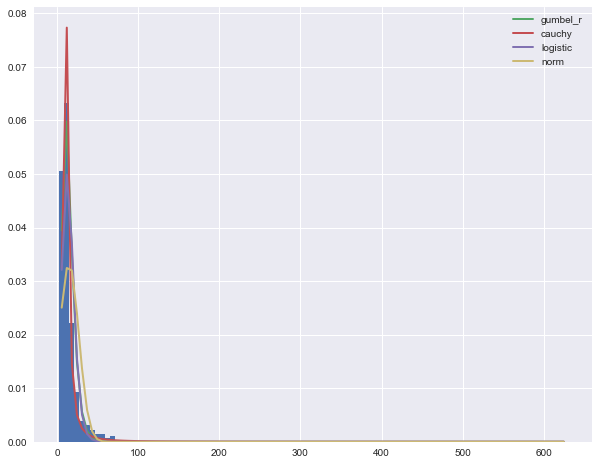

In [21]:
from fitter import Fitter
f = Fitter(fare_sample[' total_amount'])
f.fit()
f.summary()

## Which trip got the most consistent fare?

In [22]:
combine = pd.concat([trip,fare],axis = 1, join = 'inner')

In [23]:
combine

,,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,...,dropoff_latitude,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
medallion,hack_license,,,,,,,,,,,,,,,,,,,,,
91F6EB84975BBC867E32CB113C7C2CD5,AD8751110E6292079EB10EB9481FE1A6,CMT,1,N,2013-04-04 18:47:45,2013-04-04 19:00:25,1,759,2.50,-73.957855,40.765320,...,40.785648,CMT,2013-04-04 18:47:45,CRD,11.0,1.0,0.5,2.50,0.00,15.00
EC34CD1B3797DFAFF3FE099BA87B6656,8FE6A4AEDF89B6B4E19D2377FD3FB7D7,CMT,1,N,2013-04-05 07:08:34,2013-04-05 07:17:34,1,540,1.60,0.000000,0.000000,...,0.000000,CMT,2013-04-05 07:08:34,CRD,8.5,0.0,0.5,1.80,0.00,10.80
C1B9DA774DC2BBC6DE27CE994E7F44A0,E1B595FD55E4C82C1E213EB17438107A,CMT,1,N,2013-04-04 17:59:50,2013-04-04 18:21:48,1,1318,3.60,-73.982880,40.754990,...,40.715374,CMT,2013-04-04 17:59:50,CRD,16.5,1.0,0.5,3.60,0.00,21.60
9BA84250355AB3FC031C9252D395BF8A,16BB0D96A0DCC853AEC7F55C8D6C71E0,CMT,1,N,2013-04-04 18:12:01,2013-04-04 18:25:24,1,799,1.90,-73.978119,40.763451,...,40.776642,CMT,2013-04-04 18:12:01,CRD,10.0,1.0,0.5,3.45,0.00,14.95
205A696DF62AD03C88DA8C5EC5248639,579C41EA5EC846F8B641A42F9EE3E855,CMT,1,N,2013-04-04 20:12:57,2013-04-04 20:29:55,1,1017,3.60,-74.006371,40.744755,...,40.761082,CMT,2013-04-04 20:12:57,CRD,15.0,0.5,0.5,3.20,0.00,19.20
EE75E5927D00739AC342810C336A825E,1B4E92431F9DA4D49874EC76E769E874,CMT,1,N,2013-04-05 02:48:11,2013-04-05 02:51:21,2,189,0.70,-73.985191,40.754932,...,40.747997,CMT,2013-04-05 02:48:11,CRD,4.5,0.5,0.5,1.10,0.00,6.60
3B5DA0DE0868F37FD41204DB36CE87CA,BC7B6E5A0132450CAE072F3C8F60BBE4,CMT,1,N,2013-04-05 06:16:10,2013-04-05 06:22:05,1,354,1.20,-73.985168,40.763420,...,40.751144,CMT,2013-04-05 06:16:10,CRD,6.5,0.0,0.5,1.00,0.00,8.00
00B99071EE4DC8266384113B91E6AC13,013DB7F394A06CD241688F0F3E93F2F1,CMT,1,N,2013-04-05 06:20:10,2013-04-05 06:27:43,1,452,1.60,-73.980026,40.745785,...,40.756168,CMT,2013-04-05 06:20:10,CRD,8.0,0.0,0.5,2.10,0.00,10.60
75FEF473DB69BA7BC5D61F5635792E1E,FCD2C03A60D84CE91A4DEB5E6A097FCF,CMT,1,N,2013-04-04 19:20:16,2013-04-04 19:30:52,1,635,0.40,-73.978477,40.761230,...,40.759415,CMT,2013-04-04 19:20:16,CRD,7.5,1.0,0.5,2.25,0.00,11.25
